In [ ]:
#Task1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install seaborn


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Iris.csv'
iris = pd.read_csv(file_path)
print("Shape of dataset:", iris.shape)


Shape of dataset: (150, 6)


In [ ]:
print("Column names:", iris.columns)



Column names: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
print(iris.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
print(iris.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


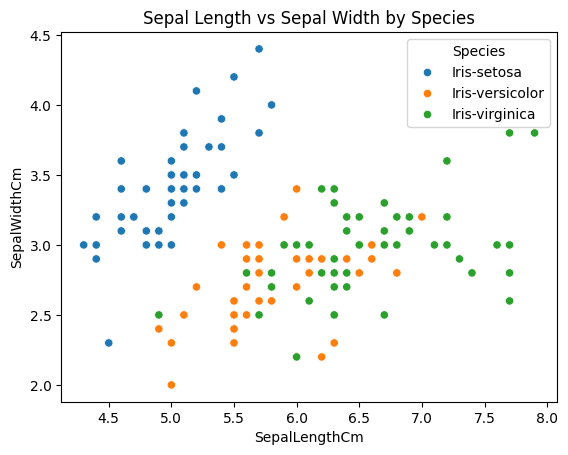

In [ ]:
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()


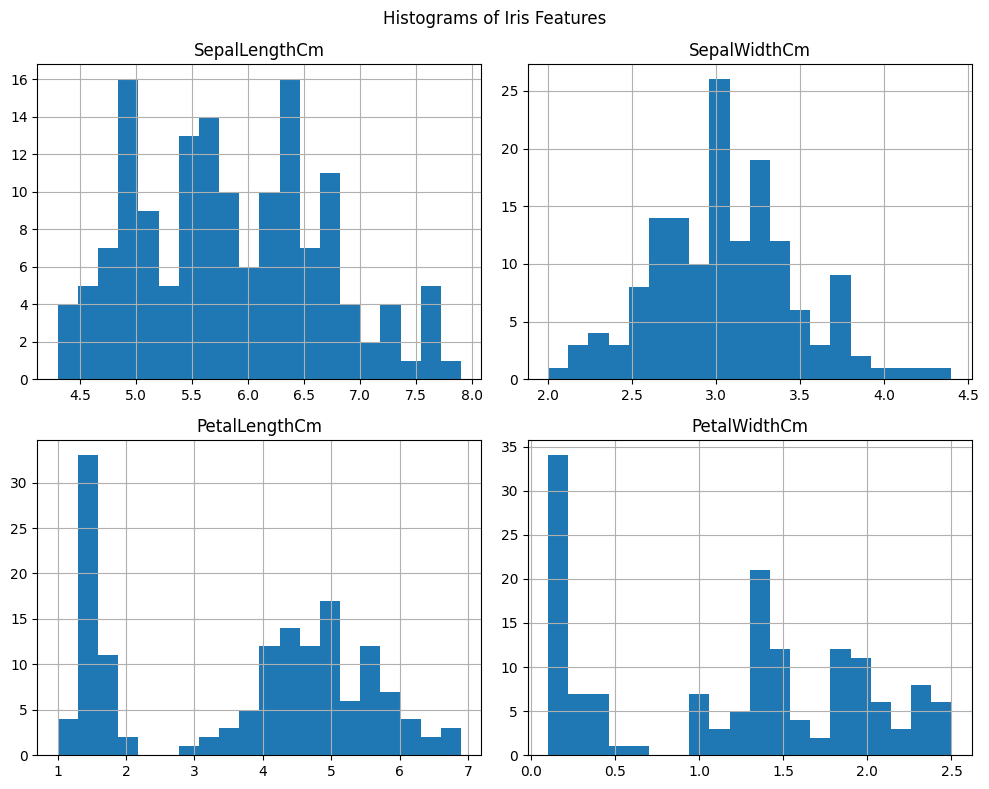

In [ ]:
iris.drop('Id', axis=1).hist(figsize=(10,8), bins=20)
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()


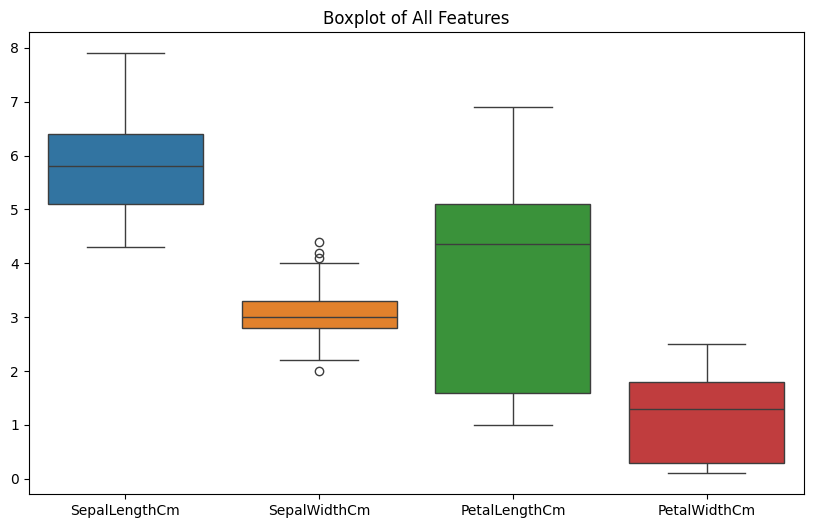

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris.drop(columns=['Id']))
plt.title("Boxplot of All Features")
plt.show()


In [ ]:
#Task 2
!pip install yfinance scikit-learn matplotlib --quiet


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [ ]:
!pip install yfinance scikit-learn matplotlib pandas


In [ ]:
# Stock symbol
stock = 'AAPL'

# Download historical data for last 2 years daily
data = yf.download(stock, period='2y', interval='1d')

# Show first 5 rows
print(data.head())

/tmp/ipython-input-22-1142215472.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period='2y', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-07-28  193.888733  194.680806  192.215484  192.740228  48291400
2023-07-31  194.502594  194.542206  193.324388  194.116461  38824100
2023-08-01  193.670944  194.779837  193.344214  194.294704  35175100
2023-08-02  190.670959  193.245177  189.948200  193.106565  50389300
2023-08-03  189.274933  190.463034  188.799695  189.670977  61235200


In [ ]:
# Create target variable 'Next_Close' by shifting 'Close' by -1 (next day)
data['Next_Close'] = data['Close'].shift(-1)

# Drop last row with NaN target
data = data.dropna()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']

print(X.head())
print(y.head())


Price             Open        High         Low    Volume
Ticker            AAPL        AAPL        AAPL      AAPL
Date                                                    
2023-07-28  192.740228  194.680806  192.215484  48291400
2023-07-31  194.116461  194.542206  193.324388  38824100
2023-08-01  194.294704  194.779837  193.344214  35175100
2023-08-02  193.106565  193.245177  189.948200  50389300
2023-08-03  189.670977  190.463034  188.799695  61235200
Date
2023-07-28    194.502594
2023-07-31    193.670944
2023-08-01    190.670959
2023-08-02    189.274933
2023-08-03    180.185944
Name: Next_Close, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


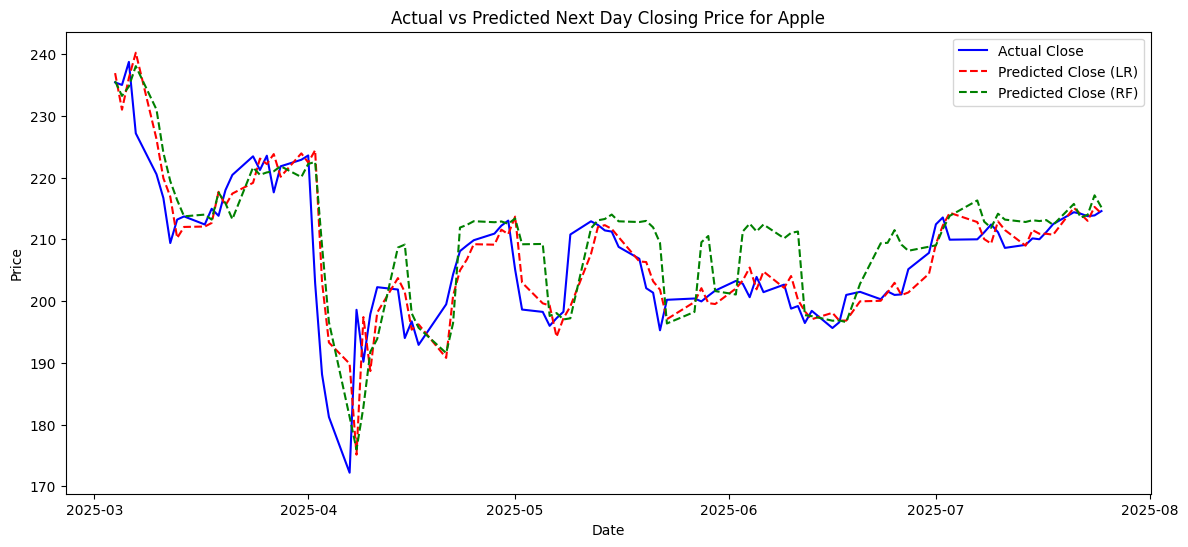

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual Close', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Predicted Close (LR)', color='red', linestyle='--')
plt.plot(y_test.index, y_pred_rf, label='Predicted Close (RF)', color='green', linestyle='--')
plt.title('Actual vs Predicted Next Day Closing Price for Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
